# Spam or Not Spam Mail Prediction Project

This Machine Learning project detects whether the given mail is ***Spam (0)*** or ***Not Spam (1)***



# *Some Examples*

**Example of Spam Mail**

> *WINNER!! As a valued network customer you have been selected to received £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only*

**Example of a Normal Mail (Not Spam)**

> *I‘m going to try for 2 months ha ha only joking*



# *Importing the Necessary Libraries*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as we
we.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# *EDA & Preprocessing*

In [3]:
df = pd.read_csv('D:\PSP\DoX\P@RTH\ITVedant\Machine Learning\Project\mail_data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
# Replacing the Ham value with Not Spam
df['Category'].replace('ham', 'not spam', inplace = True)

*Count Plot shwoing the count of spam & not spam values*

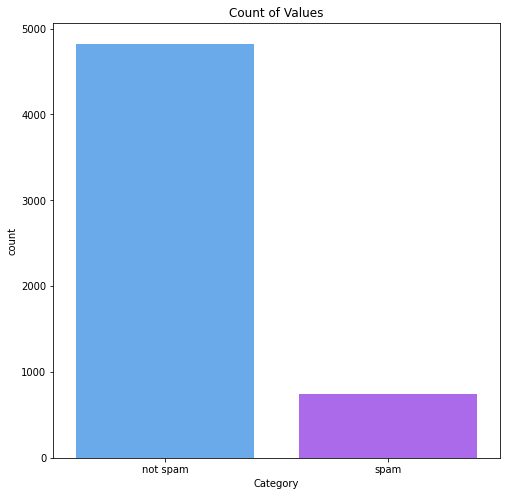

In [6]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, x = 'Category', palette = 'cool')
plt.title('Count of Values')
plt.show()

**Assigning the values using One Hot Encoding**
> *Not Spam = 1 & Spam = 0*

In [7]:
# Labeling  the Target values

df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'not spam', 'Category'] = 1

# Converting data types

df['Category'] = df['Category'].astype('int')

# *Train Test Split*

In [8]:
# Splitting The Data

X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

In [9]:
print('X Data Count:', X.shape)
print('X_train Count:', X_train.shape)
print('X_test Count:', X_test.shape)

X Data Count: (5572,)
X_train Count: (3900,)
X_test Count: (1672,)


# *Transforming the Data using Vectorizer*



> Using TfidVectorizer to transform the text data to feature vector which will be used as input for Models



In [10]:
fe = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_f = fe.fit_transform(X_train)
X_test_f = fe.transform(X_test)

# *Logistic Regression*

In [11]:
lr = LogisticRegression()



> Creating the Model using Logistic Regression



In [12]:
lr.fit(X_train_f, y_train) # Training the Model
lr_pred = lr.predict(X_test_f) # Prediction



> Getting Scores and Confusion Matrix



In [13]:
print('--------------------------')
print("Confusion Matrix")
print('')
print(confusion_matrix(y_test, lr_pred))
print('--------------------------')
print("Score:", accuracy_score(y_test, lr_pred) * 100)
print('--------------------------')

--------------------------
Confusion Matrix

[[ 159   46]
 [   1 1466]]
--------------------------
Score: 97.188995215311
--------------------------


# *Decision Tree Classifier*

In [14]:
dt = DecisionTreeClassifier()



> Creating the Model using Decision Tree Classifier



In [15]:
dt.fit(X_train_f, y_train) # Training the Model
dt_pred = dt.predict(X_test_f) # Prediction



> Getting Scores and Confusion Matrix



In [16]:
print('--------------------------')
print("Confusion Matrix")
print('')
print(confusion_matrix(y_test, dt_pred))
print('--------------------------')
print("Score:", accuracy_score(y_test, dt_pred) * 100)
print('--------------------------')

--------------------------
Confusion Matrix

[[ 174   31]
 [  23 1444]]
--------------------------
Score: 96.77033492822966
--------------------------


# *Random Forest Classifier*

In [17]:
rfc = RandomForestClassifier()



> Creating the Model using Random Forest Classifier



In [18]:
rfc.fit(X_train_f, y_train) # Training the Model
rfc_pred = rfc.predict(X_test_f) # Prediction



> Getting Scores and Confusion Matrix



In [19]:
print('--------------------------')
print("Confusion Matrix")
print('')
print(confusion_matrix(y_test, rfc_pred))
print('--------------------------')
print("Score:", accuracy_score(y_test, rfc_pred) * 100)
print('--------------------------')

--------------------------
Confusion Matrix

[[ 178   27]
 [   1 1466]]
--------------------------
Score: 98.32535885167464
--------------------------


# *Prediction System*

In [20]:
mail = ['England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+']

# Convert Text to Feature Vector
fe_mail = fe.transform(mail)

# Prediction using Logistic Regression
log_pred = lr.predict(fe_mail)

if (log_pred[0] == 0):
  print('-----------')
  print('Spam Mail, using logisctic Regression')
  print('-----------')
else:
  print('-----------')
  print('Not Spam,  using logisctic Regression')
  print('-----------')


# Prediction using Decision Tree Classifier
dec_pred = dt.predict(fe_mail)

if (dec_pred[0] == 0):
  print('Spam Mail, using Decision Tree Classifier')
else:
  print('Not Spam, using Decision Tree Classifier')


# Prediction using Random Forest Classifier
random_pred = rfc.predict(fe_mail)

if (random_pred[0] == 0):
  print('-----------')
  print('Spam Mail, using Random Forest Classifier')
  print('-----------')
else:
  print('-----------')
  print('Not Spam, using Random Forest Classifier')
  print('-----------')


-----------
Not Spam,  using logisctic Regression
-----------
Spam Mail, using Decision Tree Classifier
-----------
Spam Mail, using Random Forest Classifier
-----------
